## NervePool examples
#### September 2022
#### Sarah McGuire

In [1]:
import numpy as np

# complex.py defines a simplicial complex class and functions for pooling
import complex

ModuleNotFoundError: No module named 'networkx'

### Example 1: simplicial complex defined using list of simplices

In [2]:
# Specify lists of simplices which define a simplicial complex
vertex_list = ['a','b','c','d','e','f','g','h','i','j','k','l']
edge_list = ['ab','ac','bc','cd','cj','de','df','dg','ef','gh','gi','gj','gk','gl','hi','jk','jl','kl']
triangle_list = ['abc','gjk','gjl','gkl','jkl']
tetrahedron_list = ['gjkl']

# Gather these lists into a single list
simplices = list([vertex_list,edge_list, triangle_list, tetrahedron_list])

Using list of simplices to construct boundaries...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l'], 1: ['ab', 'ac', 'bc', 'cd', 'cj', 'de', 'df', 'dg', 'ef', 'gh', 'gi', 'gj', 'gk', 'gl', 'hi', 'jk', 'jl', 'kl'], 2: ['abc', 'gjk', 'gjl', 'gkl', 'jkl'], 3: ['gjkl']}
Drawing simplicial complex...


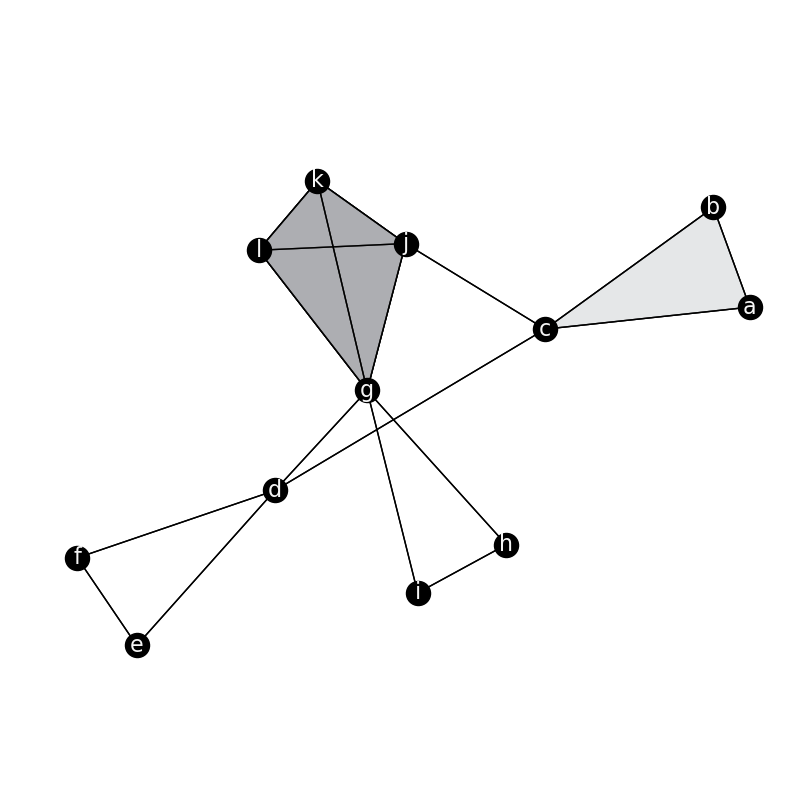

In [3]:
# Use list of simplices to define a simplicial complex, and draw it
SC1 = complex.SComplex(simplices)
SC1.drawComplex()

The simplicial complex class `SComplex` has attributes:
- simplices: dictionary of all simplices that define the complex, with dimension keys
- nodes: list of 0-dim simplices
- edges: list of 1-dim simplices
- cycles: list of 2-dim simplices
- tetra: list of 3-dim simplices
- boundaries: dictionary of all boundary matrices that define the complex, with dimension keys
- B1: numpy array 1-dim boundary matrix
- B2: numpy array 2-dim boundary matrix
- B3: numpy array 3-dim boundary matrix
- A0: numpy array 0-simplex upper adjacency matrix
- A1: numpy array 1-simplex upper adjacency matrix
- A2: numpy array 2-simplex upper adjacency matrix
- A3: numpy array 3-simplex upper adjacency matrix
- dim: maximum dimension of the simplicial complex

And auxillary functions for visualization:
- `drawComplex()`: function to visualize the complex, optionally include argument S0 to draw the vertex cover
- `visualizeA()`: function to visualize the adjacency matrices of the complex,
- `visualizeB()`: function to visualize the boundary matrices of the complex,

Visualizing ADJACENCY MATRICES...


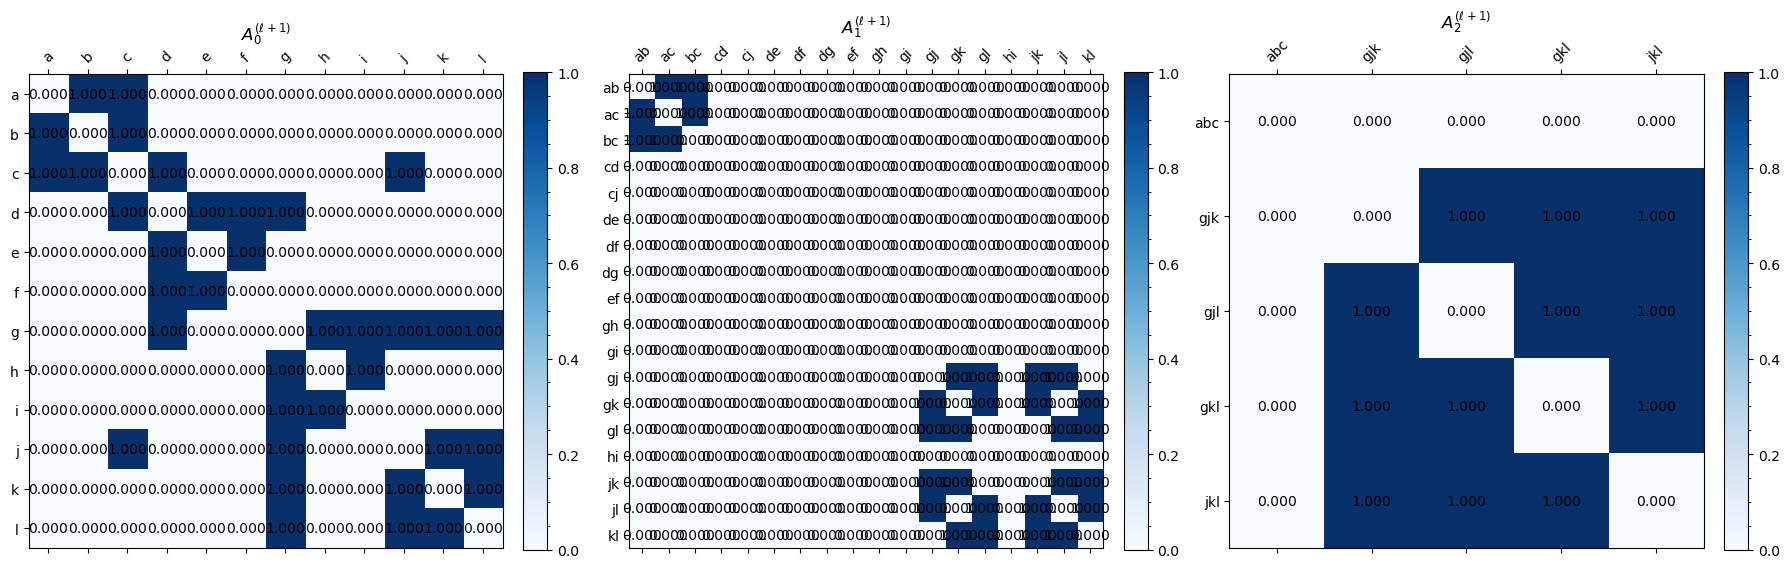

In [4]:
SC1.visualizeA()

Visualizing BOUNDARY MATRICES...


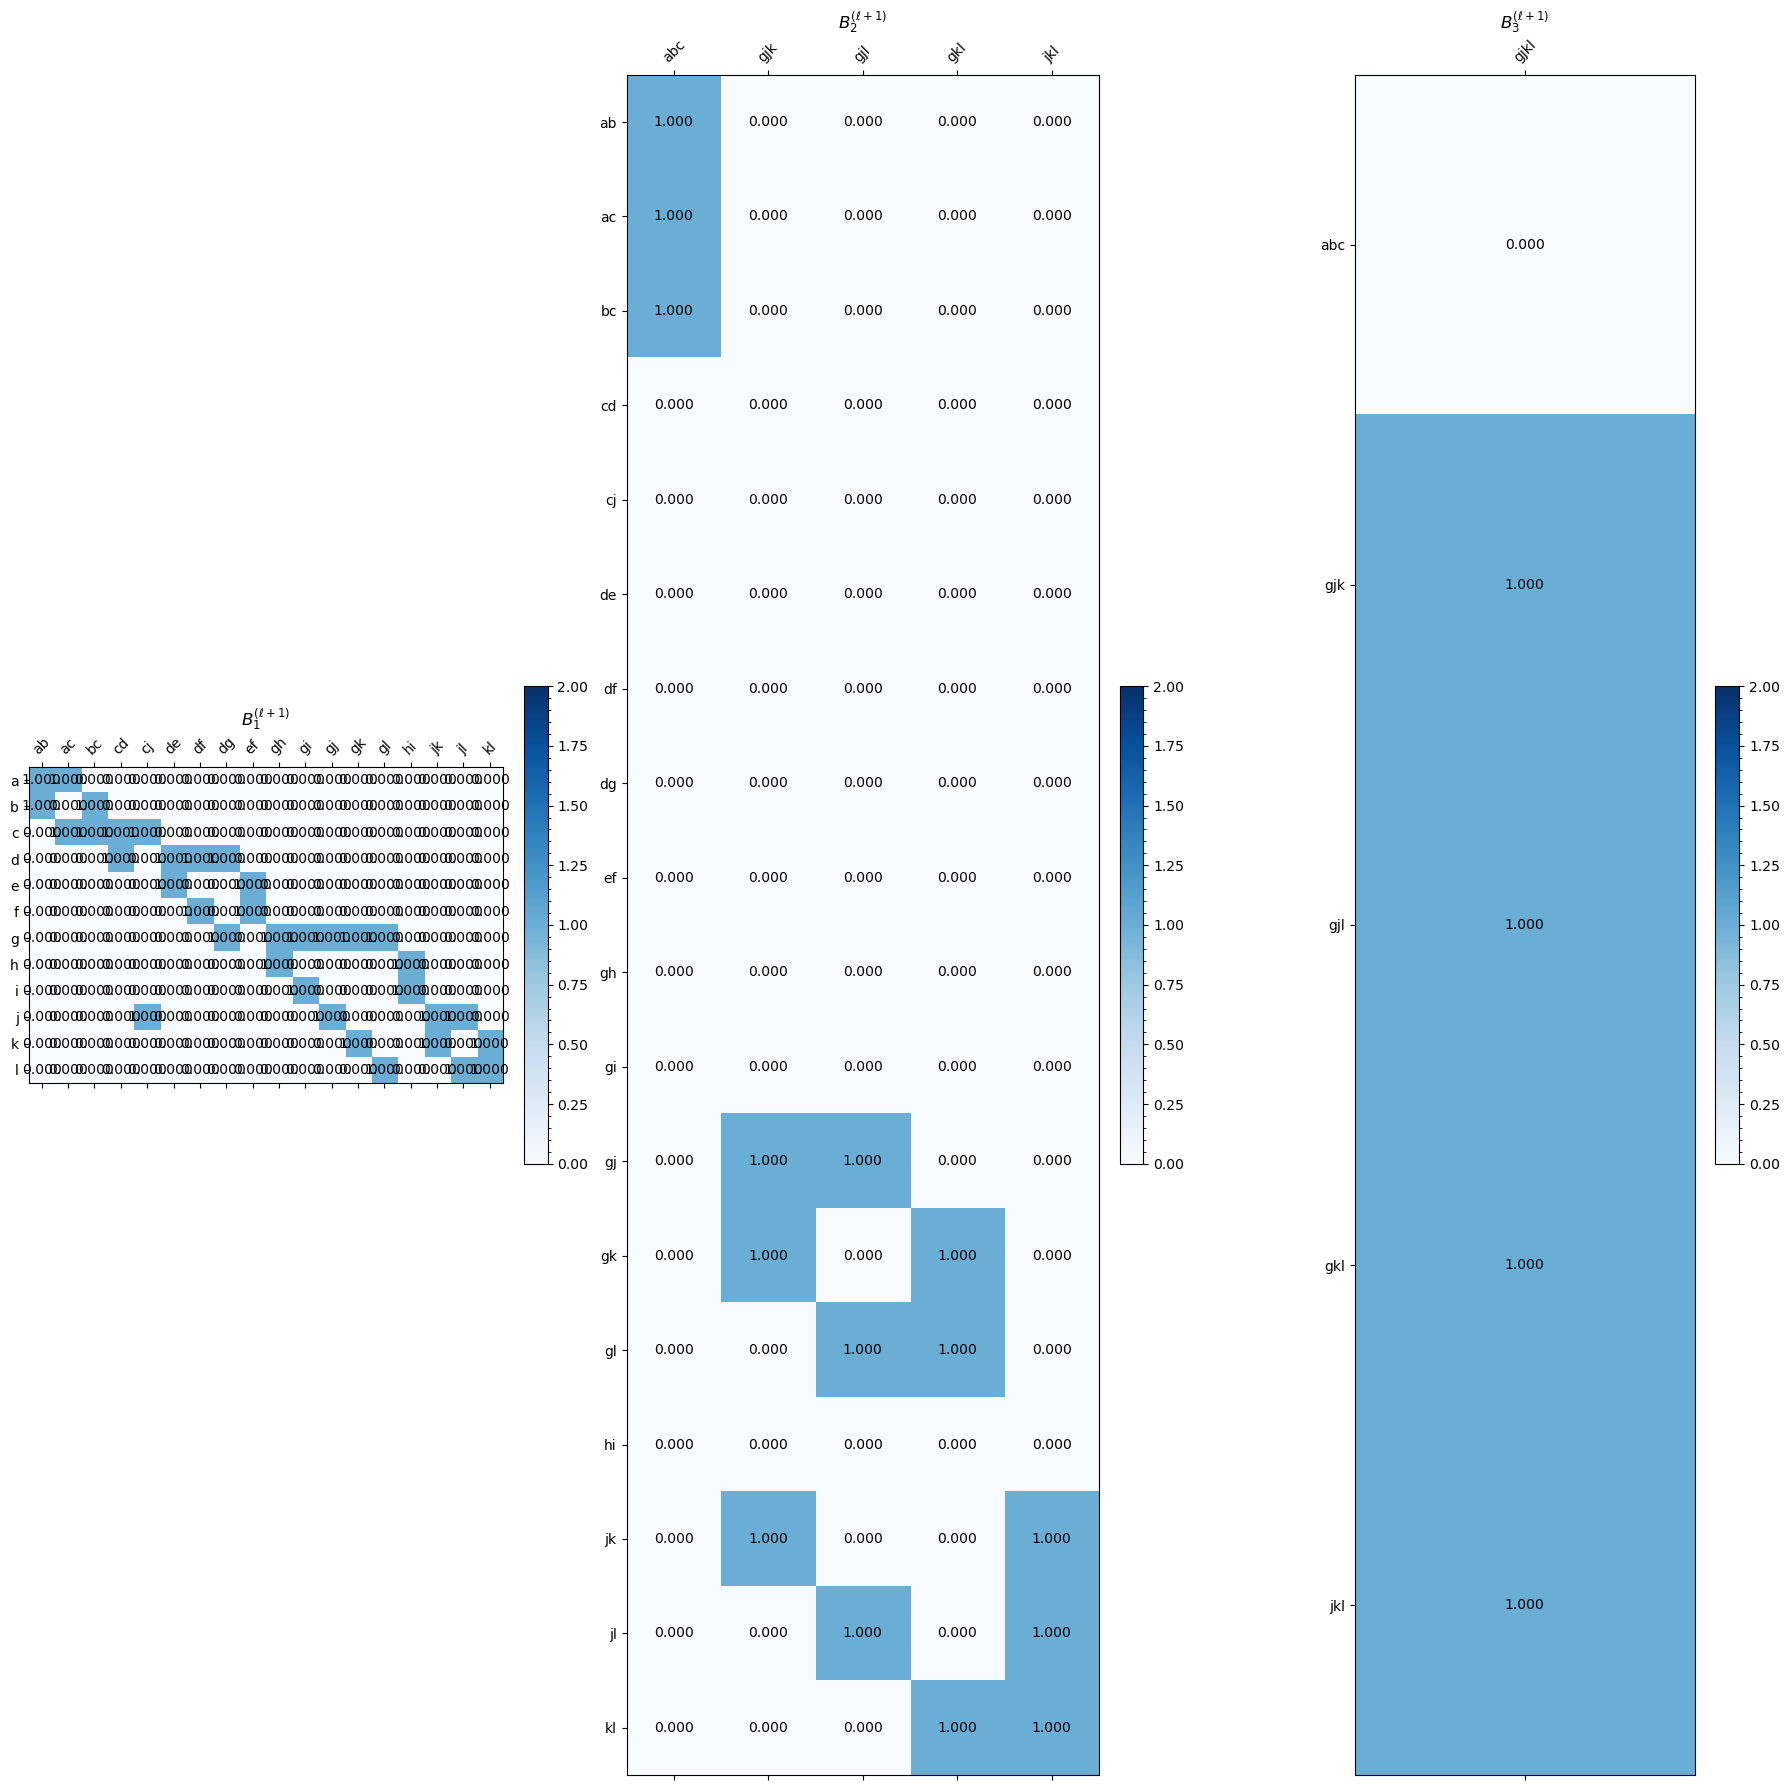

In [5]:
SC1.visualizeB()

#### Specify a vertex cover (as a numpy array of cluster membership)

Drawing simplicial complex...
Vertex partition: {0: ['a', 'b', 'c', 'j'], 1: ['d', 'e', 'f'], 2: ['g', 'h', 'i'], 3: ['k', 'l']}


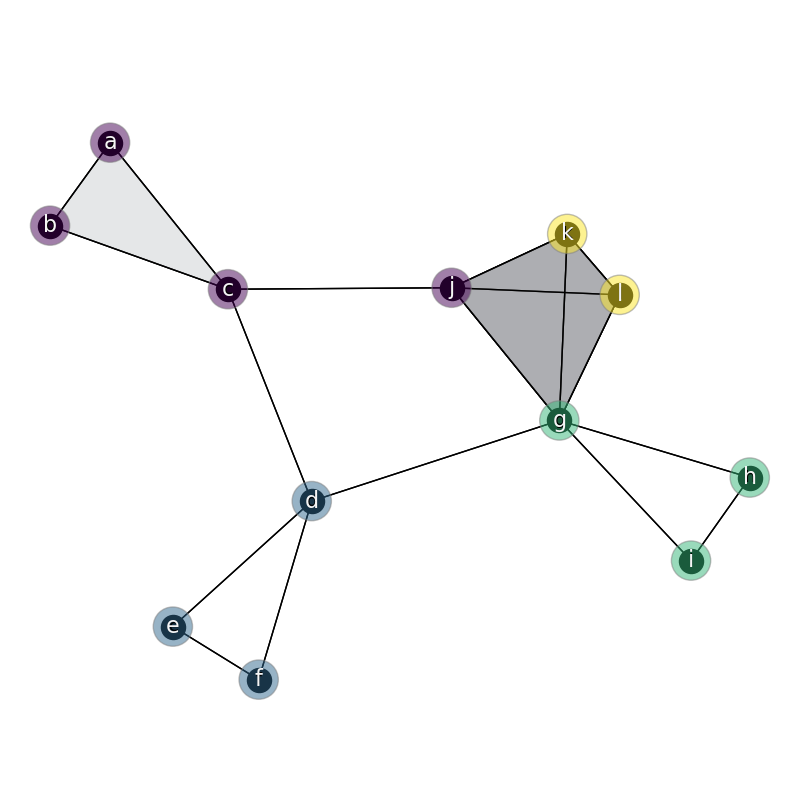

In [6]:
S0 = np.array([[1,0,0,0],[1,0,0,0],[1,0,0,0],[0,1,0,0],[0,1,0,0],[0,1,0,0],[0,0,1,0],[0,0,1,0],[0,0,1,0],[1,0,0,0],[0,0,0,1],[0,0,0,1]]) # v x v'

SC1.drawComplex(S0)


Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd'], 1: ['ab', 'ac', 'ad', 'bc', 'cd'], 2: ['acd']}
Drawing simplicial complex...


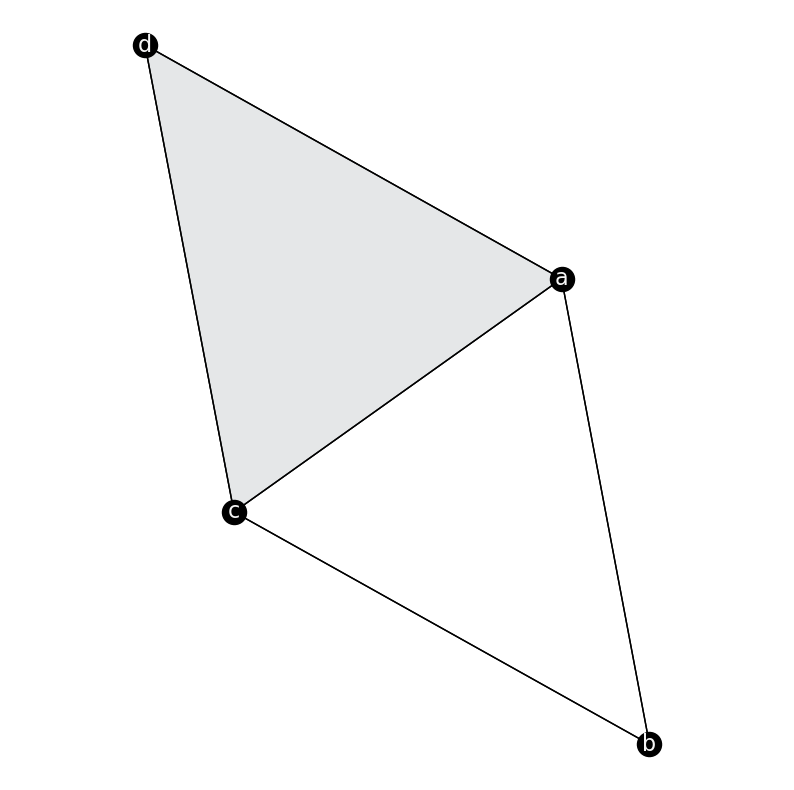

In [7]:
# Use the vertex cluster matrix S0 to pool the complex SC1
SC1_pooled = complex.pool_complex(SC1, S0)

# Draw the pooled complex
SC1_pooled.drawComplex()

The pooled simplicial complex has the following boundary matrices and corresponding adjacency matrices

Visualizing BOUNDARY MATRICES...


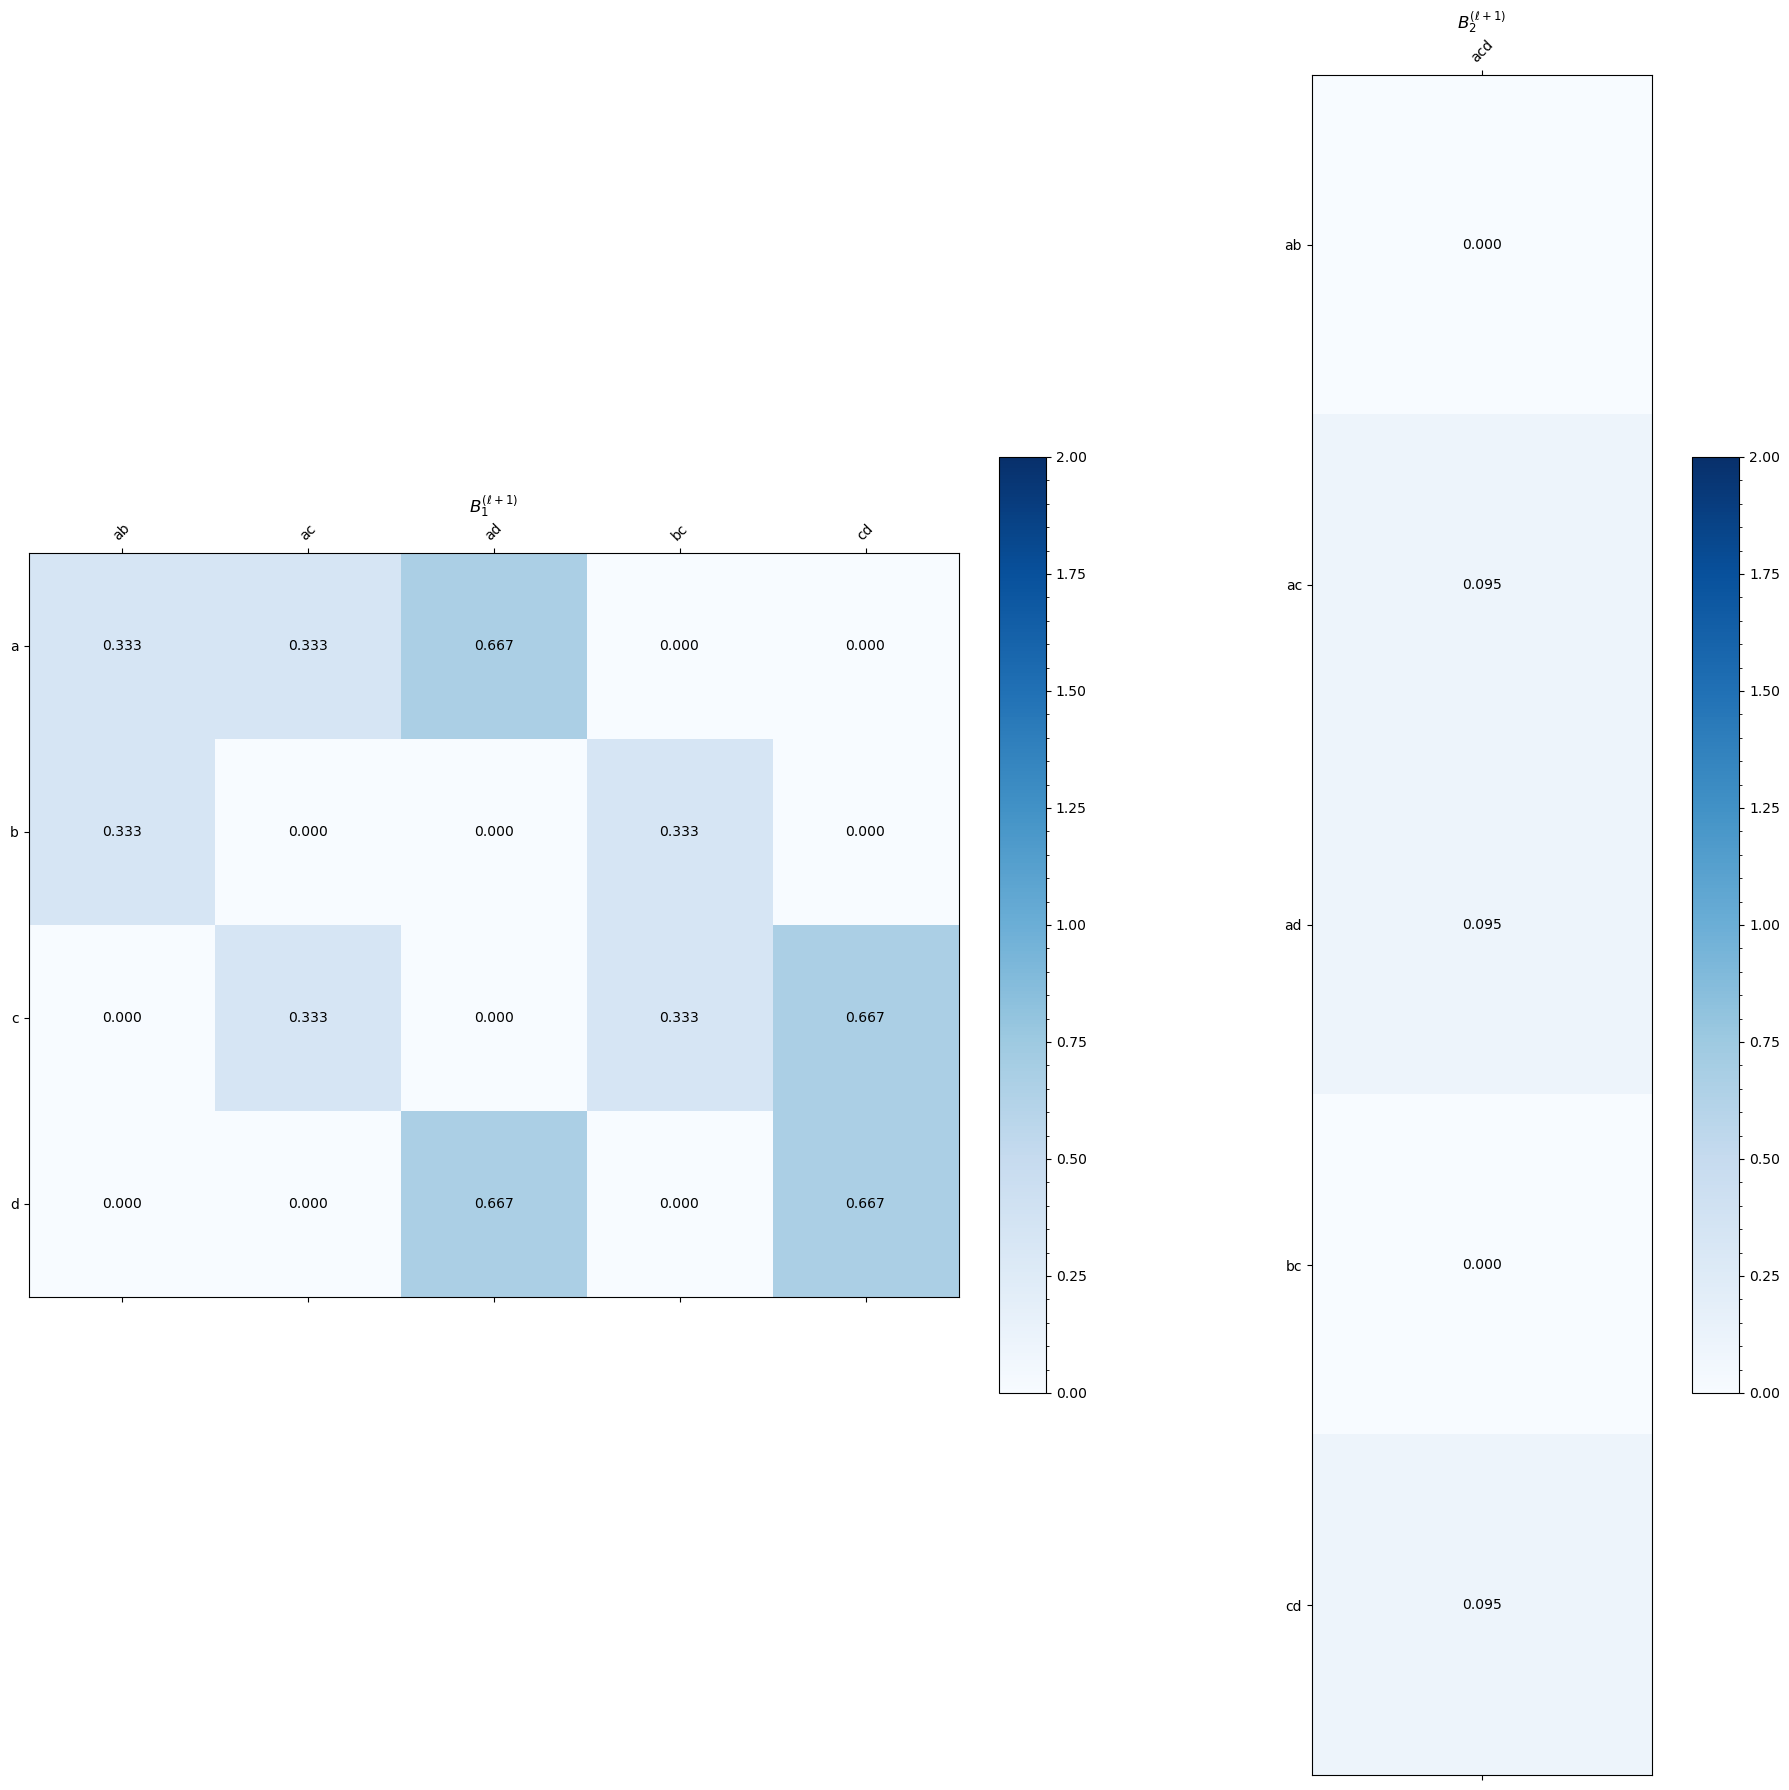

In [8]:
SC1_pooled.visualizeB()

Visualizing ADJACENCY MATRICES...


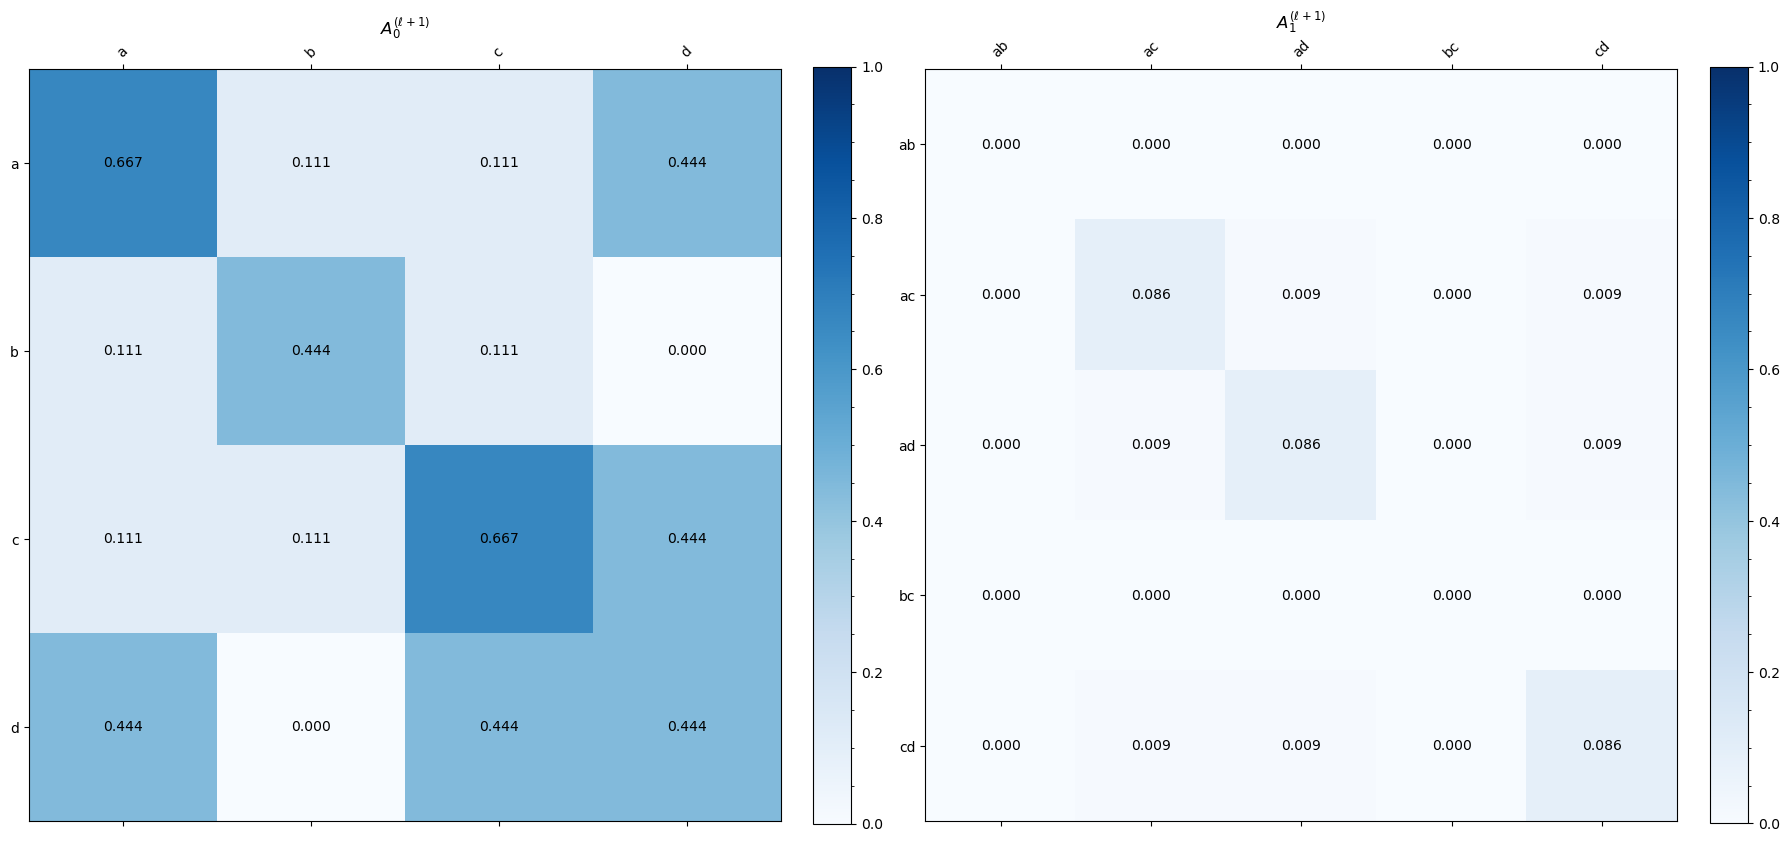

In [9]:
SC1_pooled.visualizeA()

### Example 2- "Identity" NervePool
#### For the same input simplicial complex, now consider a different choice of initial vertex. Let each vertex have its own distinct cluster i.e. $S_0$ is a permutation of the identity matrix.

Specify a vertex cover (as a numpy array of cluster membership). Choose $S_0$ to be a randomly permuted identity matrix

Drawing simplicial complex...
Vertex partition: {3: ['a'], 2: ['b'], 6: ['c'], 5: ['d'], 9: ['e'], 0: ['f'], 11: ['g'], 10: ['h'], 7: ['i'], 1: ['j'], 4: ['k'], 8: ['l']}


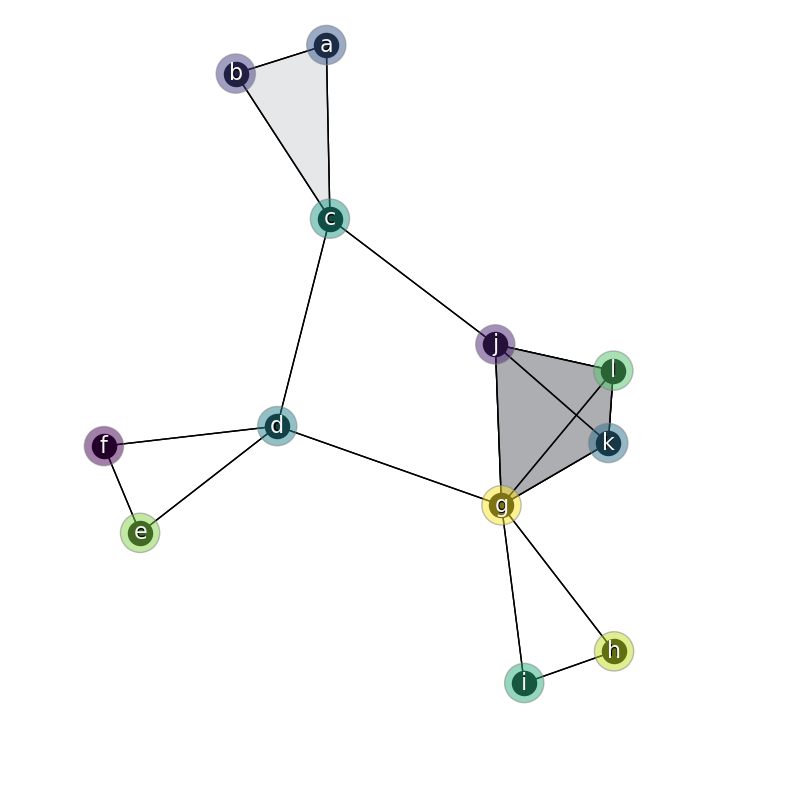

In [10]:
S0 = np.eye(len(vertex_list))
np.random.shuffle(S0)  # shuffle rows
# Visualize the complex, with clusters highlighted in different colors
SC1.drawComplex(S0)

Then, use the $S_0 = P*I_p$ to pool the simplicial complex, and note that the resulting simplicial complex has the same structure as the original. 

Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l'], 1: ['af', 'aj', 'be', 'bg', 'bi', 'bl', 'cd', 'cg', 'dg', 'ei', 'el', 'fg', 'fj', 'fl', 'hk', 'hl', 'il', 'kl'], 2: ['ibe', 'bel', 'bil', 'cgd', 'iel'], 3: ['ebil']}
Drawing simplicial complex...
Vertex partition: {3: ['a'], 2: ['b'], 6: ['c'], 5: ['d'], 9: ['e'], 0: ['f'], 11: ['g'], 10: ['h'], 7: ['i'], 1: ['j'], 4: ['k'], 8: ['l']}


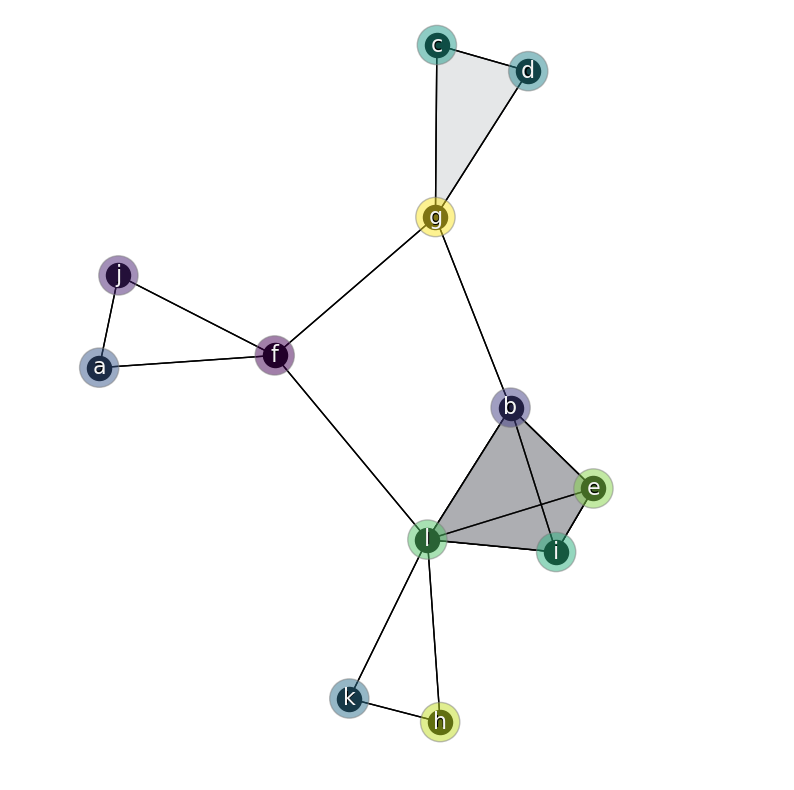

In [11]:
# Use the vertex cluster matrix S0 to pool the complex, and draw the pooled complex again
SC1_pooled = complex.pool_complex(SC1, S0)
SC1_pooled.drawComplex(S0)

### Example 2: Using a soft-partition on the vertex set

Using list of simplices to construct boundaries...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e'], 1: ['ab', 'ac', 'ad', 'bc', 'be', 'cd', 'ce', 'bd'], 2: ['bce', 'abd', 'bcd', 'abc', 'acd'], 3: ['abcd']}
Drawing simplicial complex...


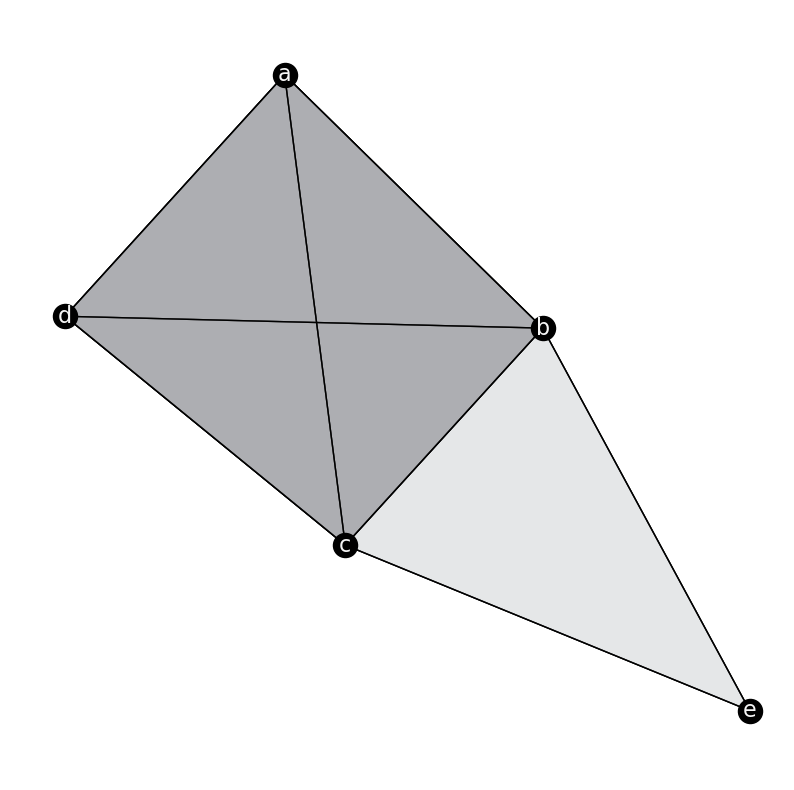

In [12]:
nodes = ['a','b','c','d','e']
edges = ['ab','ac','ad','bc','be','cd','ce', 'bd']
cycles = ['bce','abd', 'bcd','abc','acd']
tetra = ['abcd']
simplices = list([nodes, edges, cycles, tetra]) 
SC2 = complex.SComplex(simplices)
SC2.drawComplex( )

In [13]:
SC2.simplices

{0: ['a', 'b', 'c', 'd', 'e'],
 1: ['ab', 'ac', 'ad', 'bc', 'be', 'cd', 'ce', 'bd'],
 2: ['bce', 'abd', 'bcd', 'abc', 'acd'],
 3: ['abcd']}

In [14]:
# Vertex cluster assignments
S0 = np.array([[1,0,0,1],[0,1,0,0],[0,1,1,1],[0,0,1,1],[0,1,0,0]])

Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd'], 1: ['ab', 'ac', 'ad', 'bc', 'bd', 'cd'], 2: ['bac', 'bad', 'acd', 'bcd'], 3: ['bacd']}
Drawing simplicial complex...


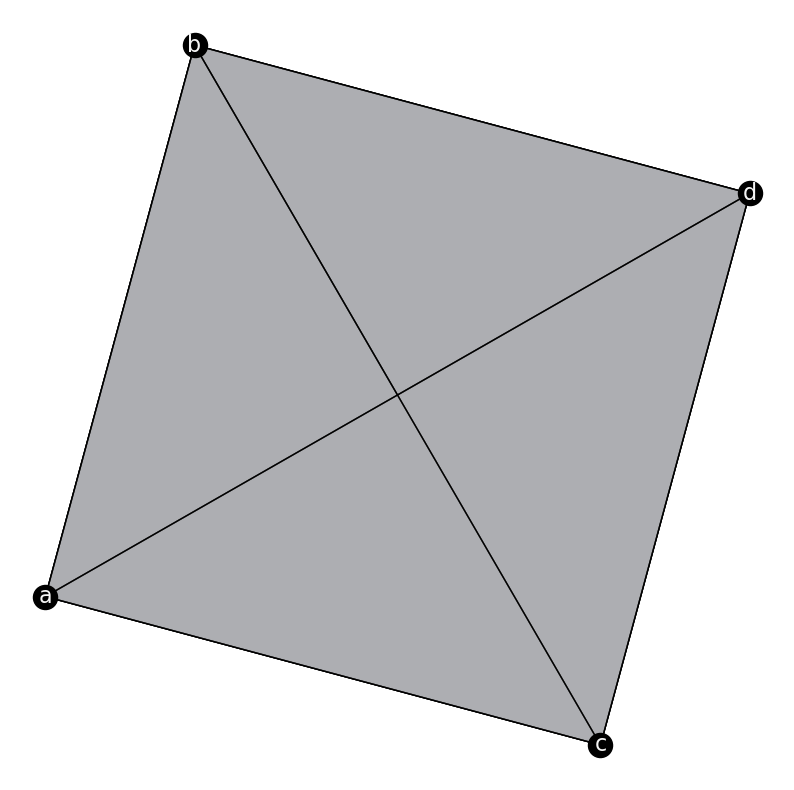

In [15]:
newSC2 = complex.pool_complex(SC2, S0)
newSC2.drawComplex()

### Example 3


Using list of simplices to construct boundaries...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f'], 1: ['ae', 'ad', 'ac', 'bc', 'be', 'cd', 'ce', 'de', 'bf'], 2: ['acd', 'ace', 'ade', 'cde'], 3: ['acde']}
Drawing simplicial complex...
Vertex partition: {0: ['a'], 1: ['b', 'e'], 2: ['c', 'd'], 3: ['f']}


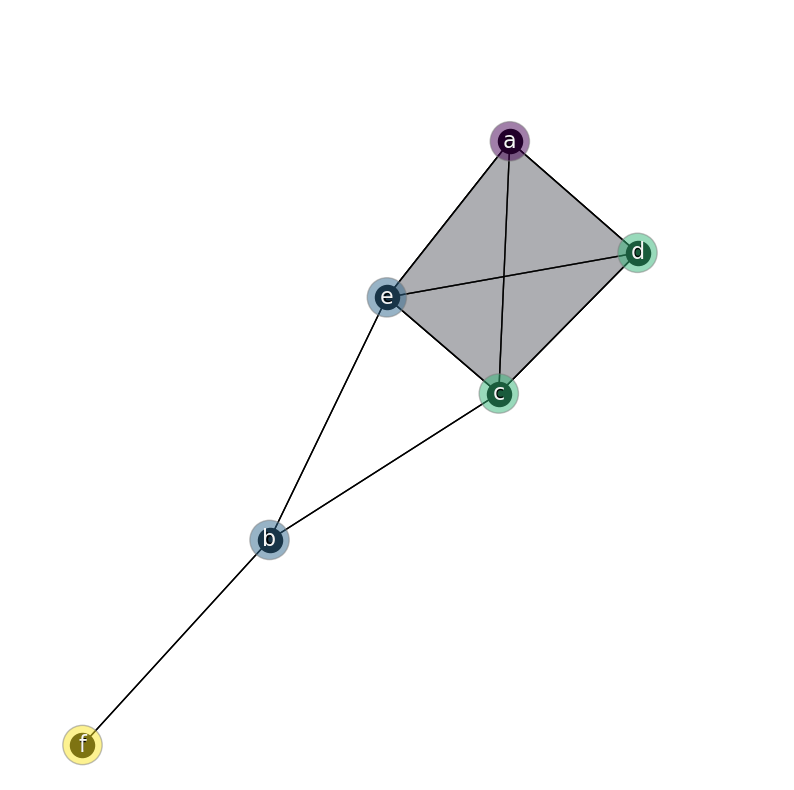

In [16]:
S0 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]) # v x v'
# lists of simplices
nodes = ['a','b','c','d','e','f']
edges = ['ae','ad','ac','bc','be','cd','ce','de','bf']
cycles = ['acd','ace','ade','cde']
tetra = ['acde']
simplices = list([nodes, edges, cycles, tetra])
SC3 = complex.SComplex(simplices)
SC3.drawComplex(S0)

In [17]:
newSC3 = complex.pool_complex(SC3, S0)

Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd'], 1: ['ab', 'ac', 'bc', 'bd'], 2: ['bac']}


Drawing simplicial complex...


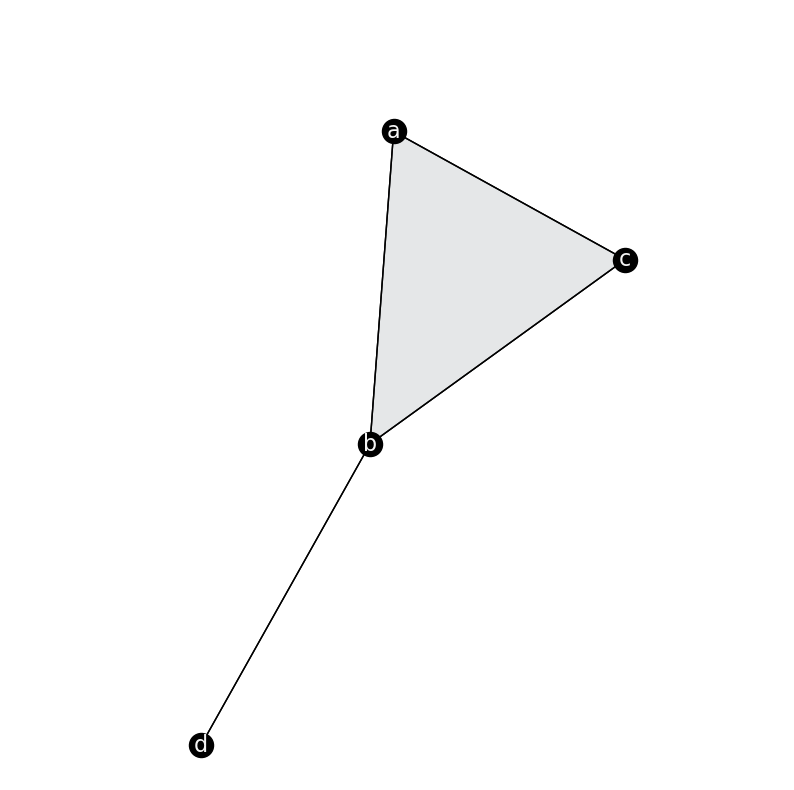

In [18]:
newSC3.drawComplex()

Visualizing BOUNDARY MATRICES...


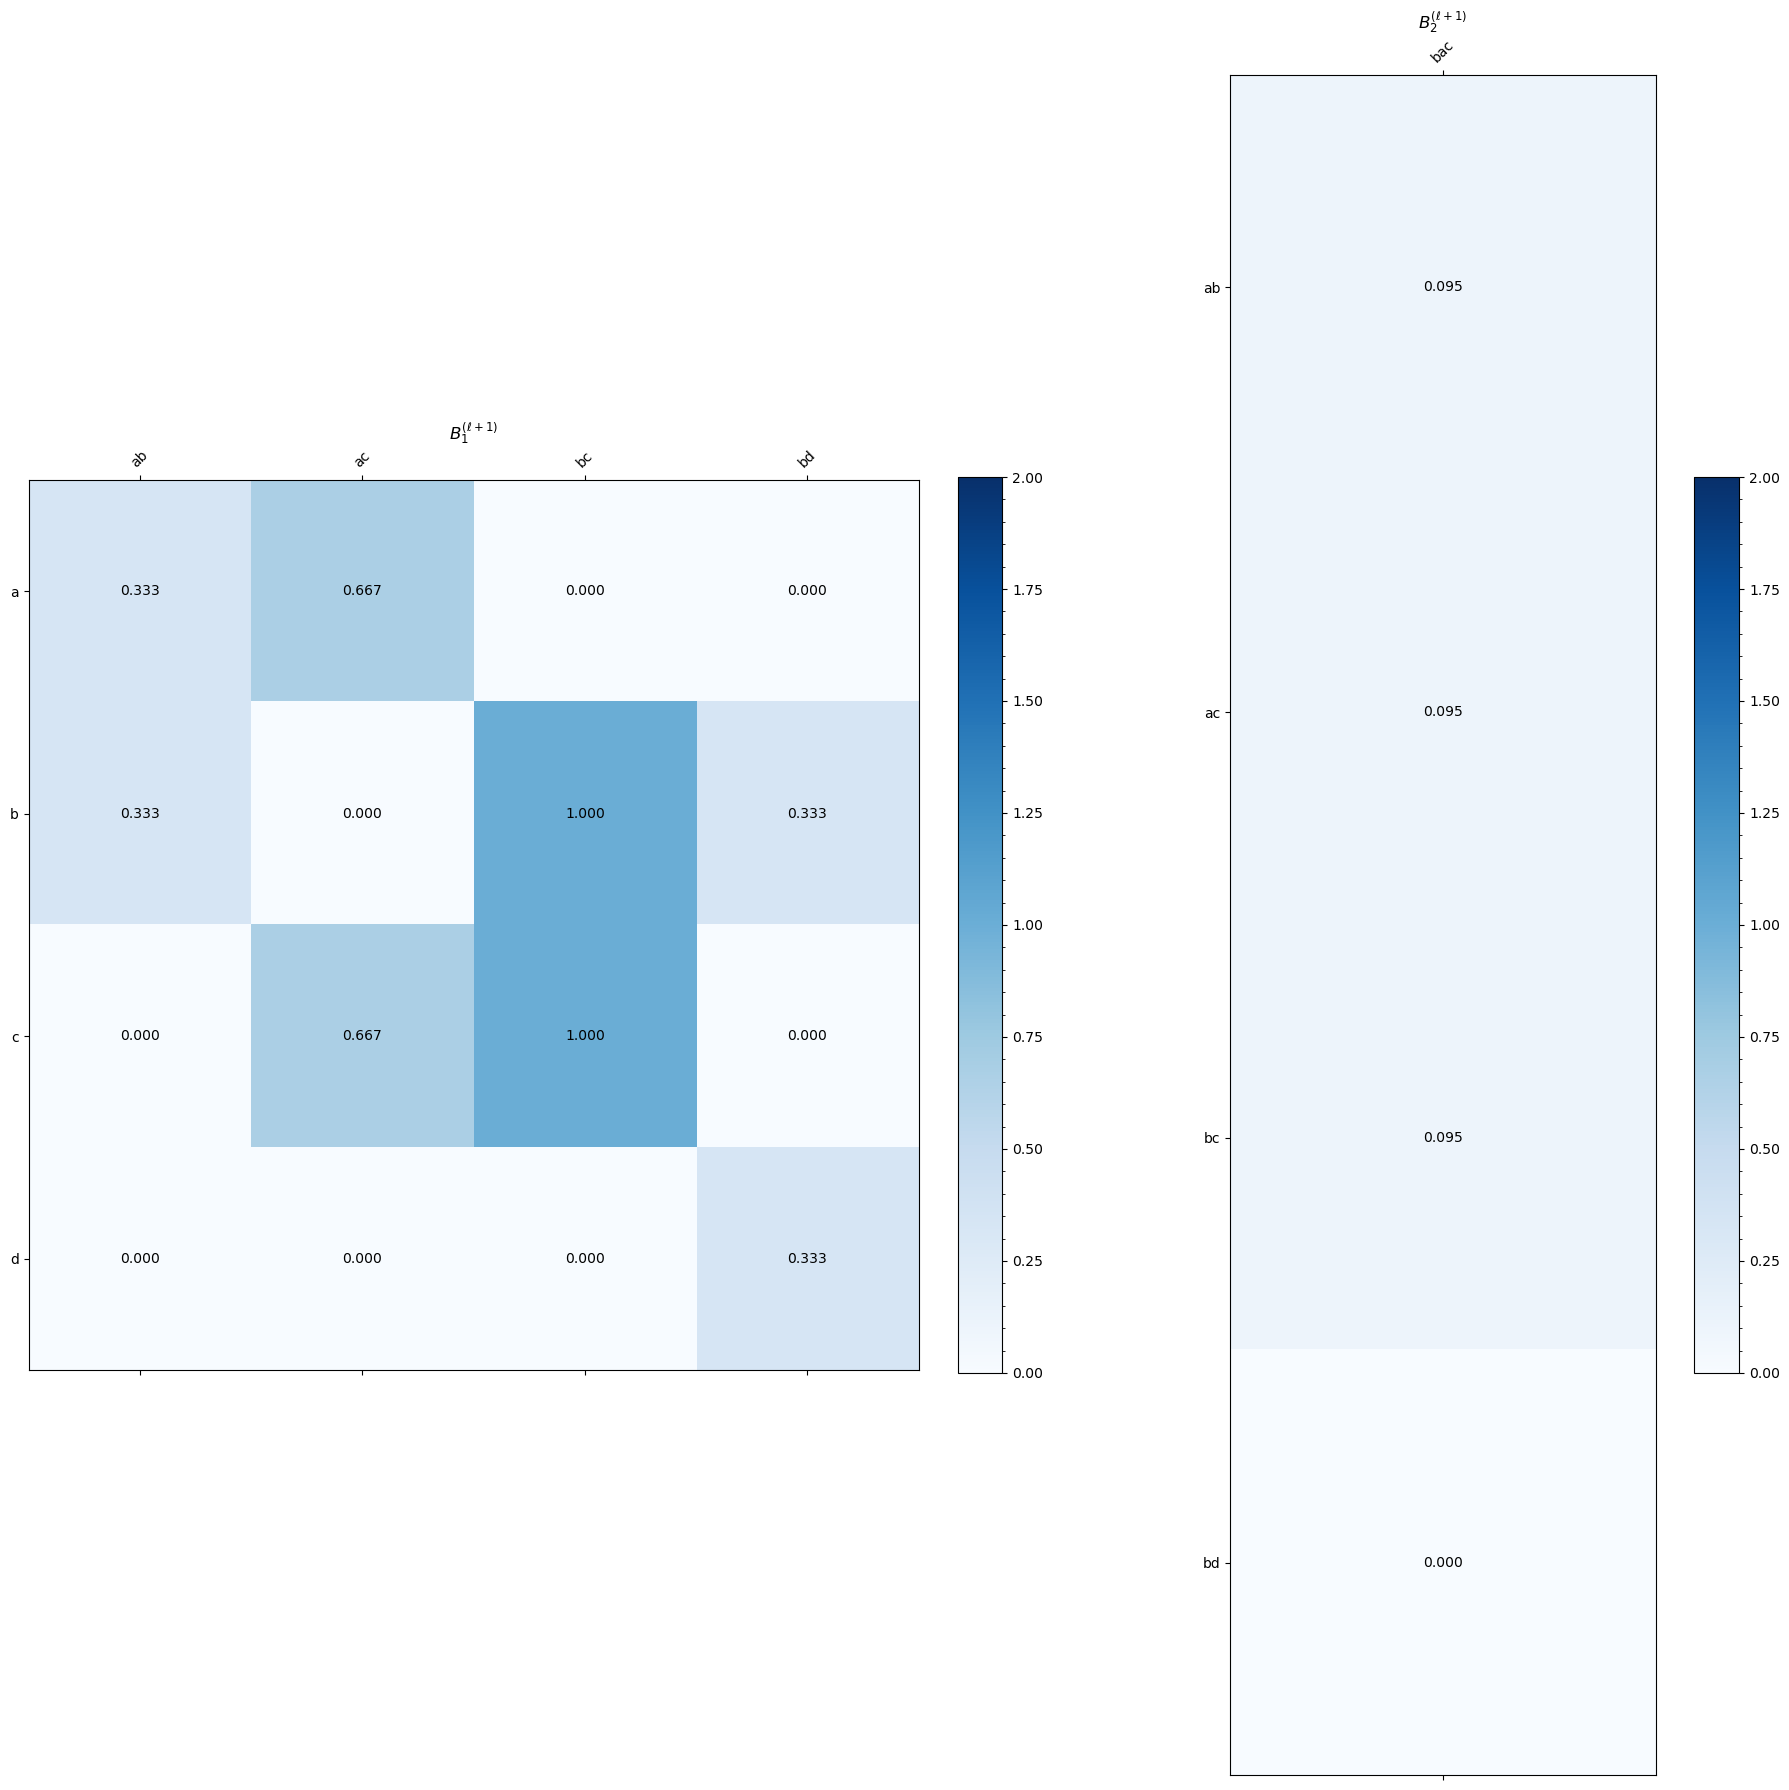

In [19]:
newSC3.visualizeB()

Visualizing ADJACENCY MATRICES...


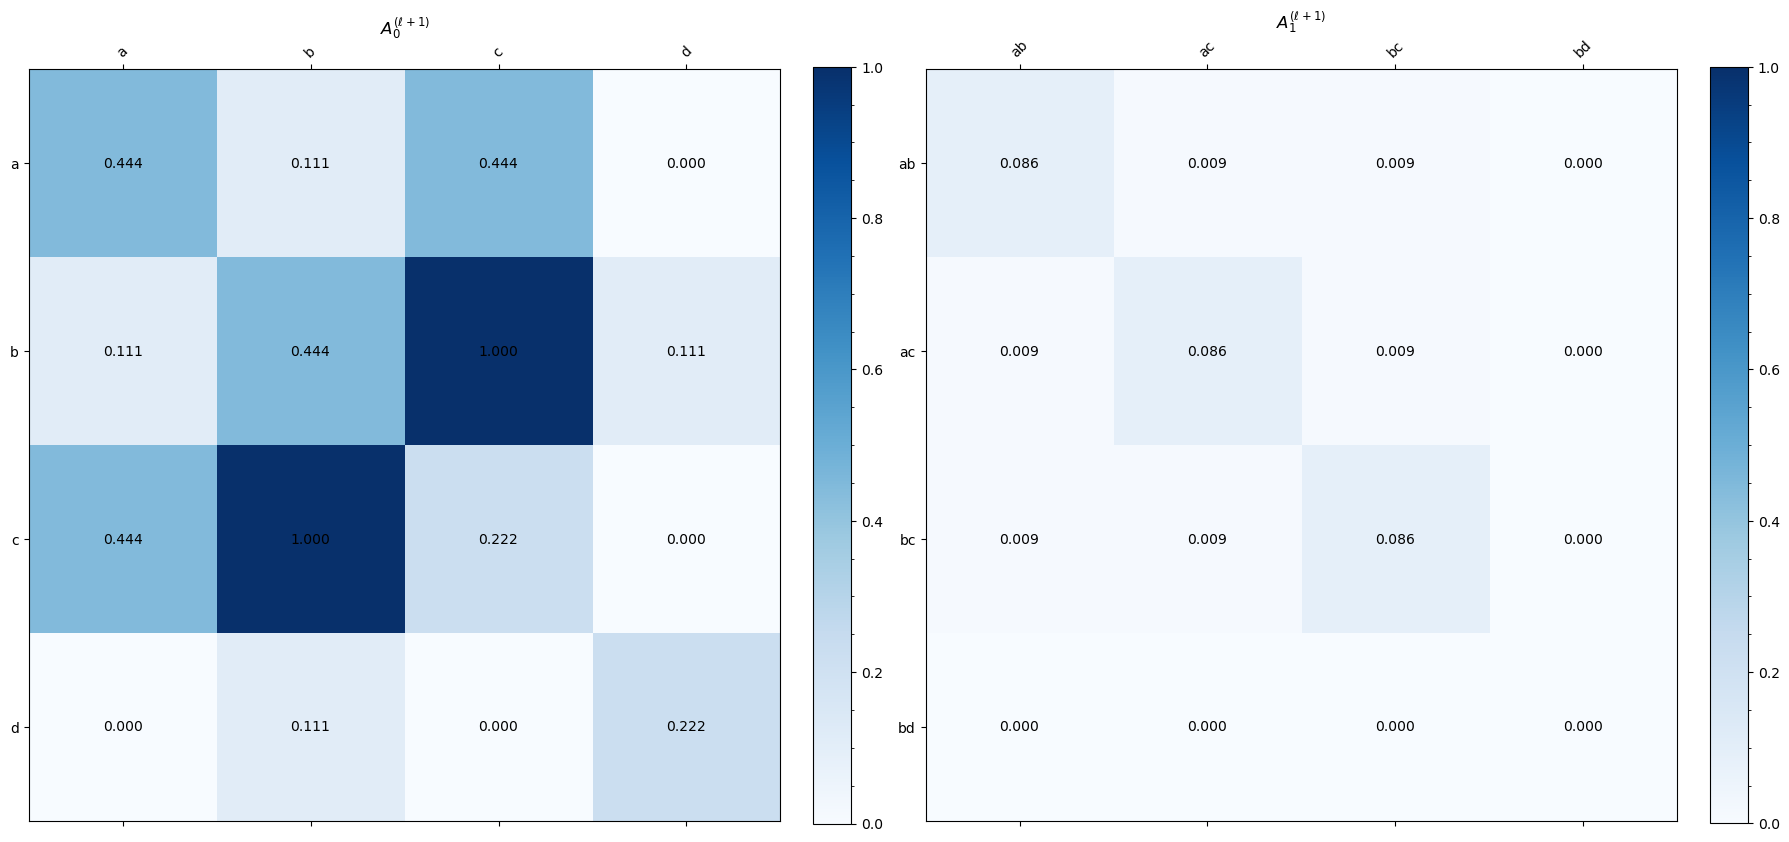

In [20]:
newSC3.visualizeA()

### Example 4- Simplicial complex defined using boundary matrices


Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd', 'e', 'f'], 1: ['ac', 'ad', 'ae', 'bc', 'be', 'bf', 'cd', 'ce', 'de'], 2: ['acd', 'aec', 'aed', 'ced'], 3: ['aecd']}
Drawing simplicial complex...


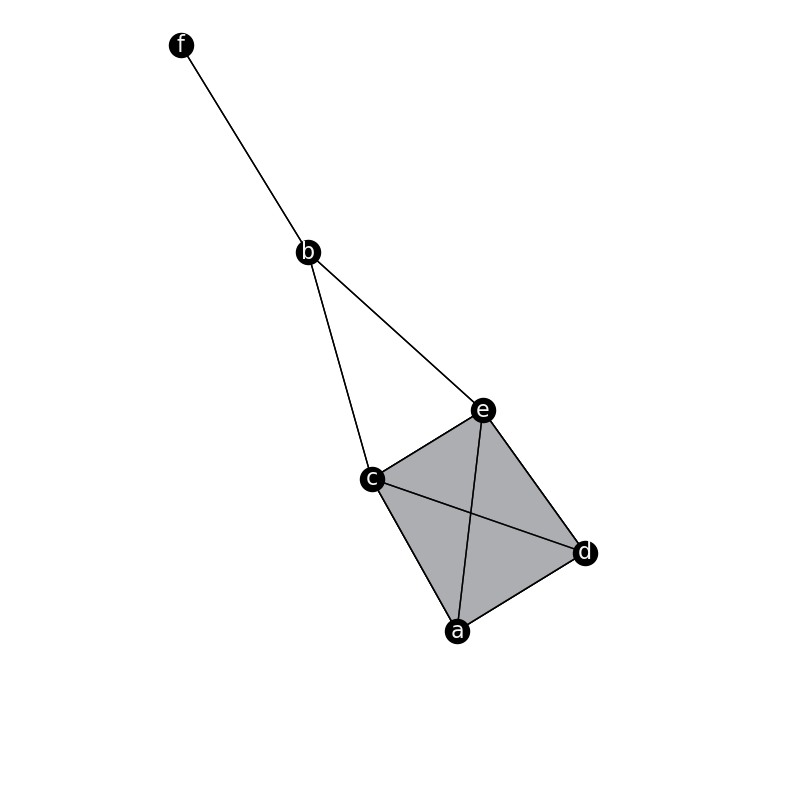

In [21]:
# boundary matrices that define SC4
B1 = np.array([[1,1,1,0,0,0,0,0,0],[0,0,0,1,1,1,0,0,0], [1,0,0,1,0,0,1,1,0], [0,1,0,0,0,0,1,0,1],[0,0,1,0,1,0,0,1,1],[0,0,0,0,0,1,0,0,0]])
B2 = np.array([[1,1,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[1,0,0,1],[0,1,0,1],[0,0,1,1]])
B3 = np.array([[1],[1],[1],[1]])
boundaries = np.array([B1,B2,B3], dtype = object)
SC4 = complex.SComplex(boundaries)
SC4.drawComplex()

In [22]:
#Using the same S0 vertex cluster assignments as Example 3 (which is the same simplicial complex, initially defined by its simplex list)
S0 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]) # v x v'


Using list of adjacency matrices to construct simplices...
Simplices: 
 {0: ['a', 'b', 'c', 'd'], 1: ['ab', 'ac', 'bc', 'bd'], 2: ['bac']}
Drawing simplicial complex...


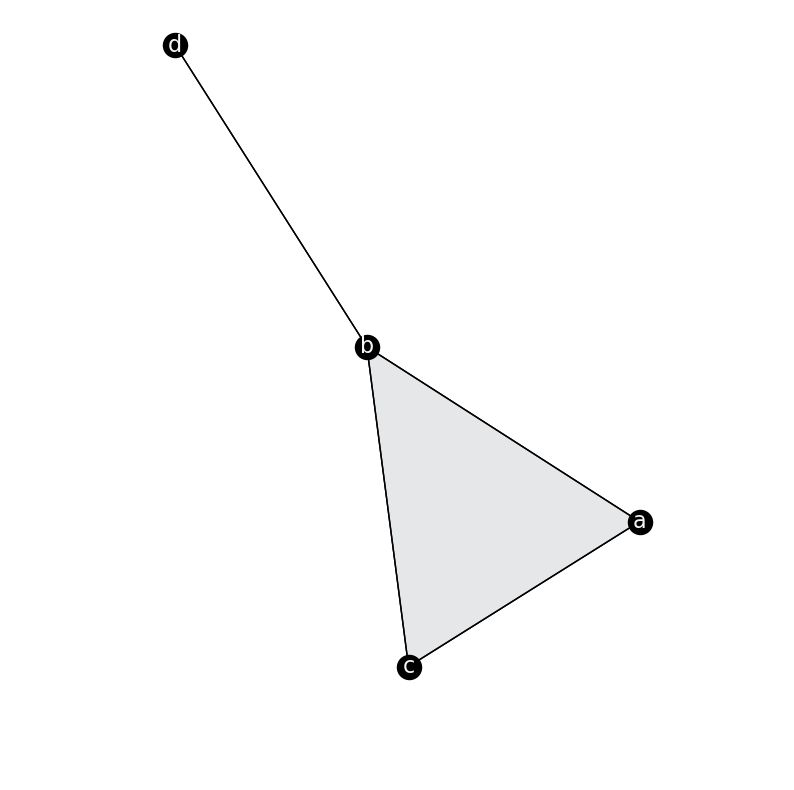

In [23]:
newSC4 = complex.pool_complex(SC4, S0)
newSC4.drawComplex()
